In [1]:
import pandas as pd
from pylab import *
from tb_DataReader import EventFeaturesReader
from tb_PulseAmpFitter import PulseAmpFitter
from tb_RunManager import getRunMngs
from tb_HVAnalyzer import HVAnalyzer
from IPython.display import clear_output

%matplotlib inline
mpl.style.use('default')

Welcome to JupyROOT 6.16/00


# 1. Fit And Plot All Runs

In [2]:
dataDir = "../data/eventFeatures"
runMngs = getRunMngs()
ana = HVAnalyzer(dataDir,runMngs)
runMngs = ana.fitAndPlotRuns(makePlots=True)
#ana.plotRuns_Hist2D()

 FCN=57.6171 FROM MIGRAD    STATUS=CONVERGED     369 CALLS         370 TOTAL
                     EDM=5.15258e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   1.98075e+00   8.57609e-02   3.04778e-04   7.87819e-04
   2  LandauMPV    2.00095e+01   1.11940e-01   5.30566e-04   2.25925e-04
   3  Normalisation   1.48532e+03   6.25246e+01   1.01314e-01   9.61317e-06
   4  GaussianSigma   4.31004e+00   1.74111e-01   2.87459e-04   2.90898e-03
                               ERR DEF= 0.5
 FCN=29.514 FROM MIGRAD    STATUS=CONVERGED     380 CALLS         381 TOTAL
                     EDM=1.18148e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   2.20782e+00   7.86032e-

# 2. Plot Volage Scan

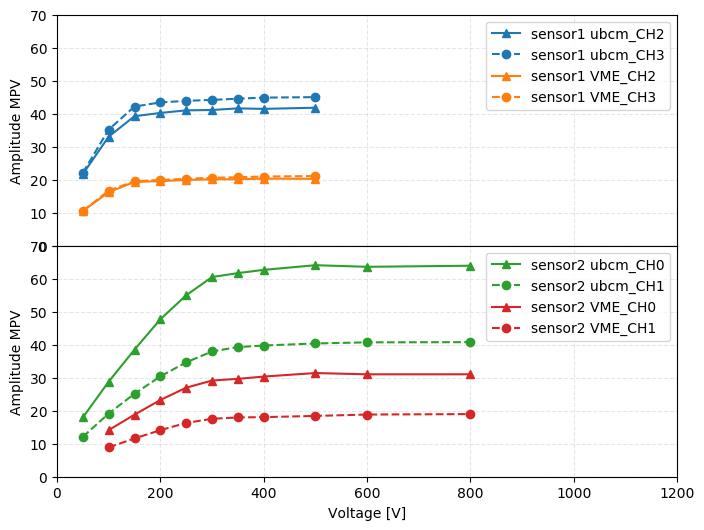

In [16]:
#plt.figure(facecolor='w',figsize=(12,4))
f, (ax1, ax2) = plt.subplots(2,1, sharey=True, facecolor='w',figsize=(8,6))
plt.subplots_adjust(hspace=0)
#plotParam = "mu"
plotParam = "argmax"

runMng = runMngs[0]
l = "ubcm_CH2"
u, y = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l])
ax1.errorbar(u[~np.isnan(y)], y[~np.isnan(y)], fmt='^-',color='C0',label='sensor1 '+l)

l = "ubcm_CH3"
u, y = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l])
ax1.errorbar(u[~np.isnan(y)], y[~np.isnan(y)], fmt='o--',color='C0',label='sensor1 '+l)

l = "VME_CH2"
u, y = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l])
ax1.errorbar(u[~np.isnan(y)], y[~np.isnan(y)], fmt='^-',color='C1',label='sensor1 '+l)

l = "VME_CH3"
u, y = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l])
ax1.errorbar(u[~np.isnan(y)], y[~np.isnan(y)],  fmt='o--',color='C1',label='sensor1 '+l)


ax1.set_xlim(0,1200)
ax1.set_ylim(0,70)
ax1.legend(loc="upper right")
ax1.grid(linestyle='--',alpha=0.3)
ax1.set_ylabel("Amplitude MPV")
ax1.set_xticklabels([])


runMng = runMngs[1]
l = "ubcm_CH0"
u, y = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l])
ax2.errorbar(u[~np.isnan(y)], y[~np.isnan(y)], fmt='^-',color='C2',label='sensor2 '+l)

l = "ubcm_CH1"
u, y = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l])
ax2.errorbar(u[~np.isnan(y)], y[~np.isnan(y)], fmt='o--',color='C2',label='sensor2 '+l)

l = "VME_CH0"
u, y = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l])
ax2.errorbar(u[~np.isnan(y)], y[~np.isnan(y)], fmt='^-',color='C3',label='sensor2 '+l)

l = "VME_CH1"
u, y = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l])
ax2.errorbar(u[~np.isnan(y)], y[~np.isnan(y)], fmt='o--',color='C3',label='sensor2 '+l)

ax2.set_xlim(0,1200)
ax2.set_ylim(0,70)


ax2.legend(loc="upper right")
ax2.grid(linestyle='--',alpha=0.3)
ax2.set_xlabel("Voltage [V]")
ax2.set_ylabel("Amplitude MPV")

plt.savefig("../plots/voltageScan_MPV.png",dpi=300)

# Include Calibration

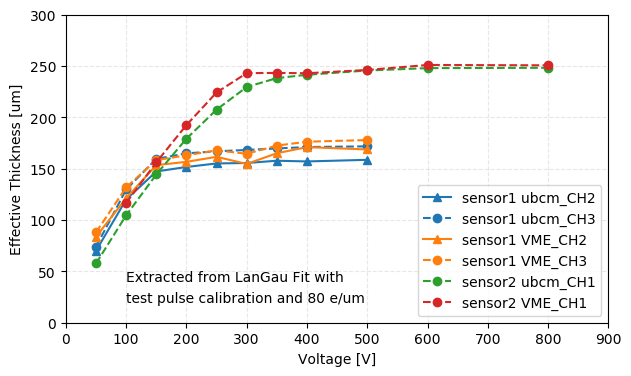

In [15]:
const = pd.read_pickle("../data/calibration_linearFit.pkl")
plt.figure(facecolor='w',figsize=(7,4))
plotParam = "argmax"

runMng = runMngs[0]
l = "ubcm_CH2"
u, y, y_bs = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l]), np.array(runMng['baseline_mean_'+l])
y = y_bs + y
y = (y*const[l][0] + const[l][1])/80
plt.errorbar(u[~np.isnan(y)], y[~np.isnan(y)], fmt='^-',color='C0',label='sensor1 '+l)

l = "ubcm_CH3"
u, y, y_bs = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l]), np.array(runMng['baseline_mean_'+l])
y = y_bs + y
y = (y*const[l][0] + const[l][1])/80
plt.errorbar(u[~np.isnan(y)], y[~np.isnan(y)], fmt='o--',color='C0',label='sensor1 '+l)

l = "VME_CH2"
u, y, y_bs = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l]), np.array(runMng['baseline_mean_'+l])
y = y_bs - y
y = (y*const[l][0] + const[l][1])/80
plt.errorbar(u[~np.isnan(y)], y[~np.isnan(y)], fmt='^-',color='C1',label='sensor1 '+l)

l = "VME_CH3"
u, y, y_bs = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l]), np.array(runMng['baseline_mean_'+l])
y = y_bs - y
y = (y*const[l][0] + const[l][1])/80
plt.errorbar(u[~np.isnan(y)], y[~np.isnan(y)],  fmt='o--',color='C1',label='sensor1 '+l)



runMng = runMngs[1]

l = "ubcm_CH1"
u, y, y_bs = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l]), np.array(runMng['baseline_mean_'+l])
y = y_bs + y
y = (y*const[l][0] + const[l][1])/80
plt.errorbar(u[~np.isnan(y)], y[~np.isnan(y)], fmt='o--',color='C2',label='sensor2 '+l)

l = "VME_CH1"
u, y, y_bs = np.array(runMng['u']), np.array(runMng[plotParam+'_'+l]), np.array(runMng['baseline_mean_'+l])
y = y_bs - y
y = (y*const[l][0] + const[l][1])/80
plt.errorbar(u[~np.isnan(y)], y[~np.isnan(y)], fmt='o--',color='C3',label='sensor2 '+l)

plt.xlim(0,900)
plt.ylim(0,300)


plt.legend(loc="lower right")
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel("Effective Thickness [um]")
plt.xlabel("Voltage [V]")
plt.text(100,40,"Extracted from LanGau Fit with")
plt.text(100,20,"test pulse calibration and 80 e/um")

plt.savefig("../plots/voltageScan_thickness.png",dpi=300)